___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

# WELCOME!

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

The project consists of 3 parts:
* First part is related with 'data cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.
* Second part is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.
* Third part is related with 'handling outliers of data' via Visualisation libraries. Some insights are extracted.


## Functions to use

In [360]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore") 
warnings.warn("this will not show")

%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid") 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 150 
pd.options.display.max_columns = 100
import json
import regex as re
from datetime import date
from datetime import datetime
from datetime import timedelta

In [361]:
def fill_most_freq(df, group_col, col_name):
    
    '''Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
    
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [362]:
def fill_prop(df, group_col, col_name):
    
    '''Fills the missing values with "ffill and bfill method" according to single-stage grouping'''
    
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [363]:
def fill(df, group_col1, group_col2, col_name, method): # method can be either "mode" or "mean" or "median" or "ffill"
    
    '''Fills the missing values with "mode/mean/median/ffill/bfill method" according to double-stage grouping'''
    
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])

    elif method == "mean":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df[col_name].mean(), inplace = True)
        
    elif method == "median":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df[col_name].median(), inplace = True)
        
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [364]:
# function for first looking to the columns

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

In [365]:
def fill_median(df, group_col1, group_col2, group_col3, col_name):
    
    df[col_name].fillna(df.groupby([group_col1, group_col2, group_col3])[col_name].transform("median"), inplace = True)
    df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("median"), inplace = True)
    df[col_name].fillna(df.groupby(group_col1)[col_name].transform("median"), inplace = True)
    df[col_name].fillna(df[col_name].median(), inplace = True)

    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))        

# PART- 1 `( Data Cleaning )`

In [366]:
df0 = pd.read_excel("scout_car_dropped.xlsx")
df = df0.copy()

In [367]:
df.head()

Unnamed: 0 make_model body_type  price               vat     km  \
0           0    Audi A1    Sedans  15770    VAT deductible  56013   
1           1    Audi A1    Sedans  14500  Price negotiable  80000   
2           2    Audi A1    Sedans  14640    VAT deductible  83450   
3           3    Audi A1    Sedans  14500               NaN  73000   
4           4    Audi A1    Sedans  16790               NaN  16200   

  registration      hp    type  previous_owners  make model  \
0      01/2016  66.000  Diesel            2.000  Audi    A1   
1      03/2017 141.000  Benzin              NaN  Audi    A1   
2      02/2016  85.000  Diesel            1.000  Audi    A1   
3      08/2016  66.000  Diesel            1.000  Audi    A1   
4      05/2016  66.000  Diesel            1.000  Audi    A1   

   first_registration body_color paint_type    upholstery    body  \
0            2016.000      Black   Metallic  Cloth, Black  Sedans   
1            2017.000        Red        NaN   Cloth, Grey  Sedans   
2            2016.000      Black   Metallic  Cloth, Black  Sedans   
3            2016.000      Brown   Metallic           NaN  Sedans   
4            2016.000      Black   Metallic  Cloth, Black  Sedans   

   nr_of_doors  nr_of_seats gearing_type  displacement  cylinders   weight  \
0        5.000        5.000    Automatic      1422.000      3.000 1220.000   
1        3.000        4.000    Automatic      1798.000      4.000 1255.000   
2        4.000        4.000    Automatic      1598.000        NaN      NaN   
3        3.000        4.000    Automatic      1422.000      3.000 1195.000   
4        5.000        5.000    Automatic      1422.000      3.000      NaN   

  drive_chain    fuel  co_2_emission emission_class  gears country_version  \
0       front  Diesel         99.000         Euro 6    NaN             NaN   
1       front  Benzin        129.000         Euro 6  7.000             NaN   
2       front  Diesel         99.000         Euro 6    NaN             NaN   
3         NaN  Diesel         99.000         Euro 6  6.000             NaN   
4       front  Diesel        109.000         Euro 6    NaN         Germany   

   cons_combined  cons_city  cons_country          air_cond  bluetooth  
0          3.800      4.300         3.500  Air conditioning  Bluetooth  
1          5.600      7.100         4.700  Air conditioning  Bluetooth  
2          3.800      4.400         3.400  Air conditioning        MP3  
3          3.800      4.300         3.500    Air suspension  Bluetooth  
4          4.100      4.600         3.800  Air conditioning  Bluetooth

In [368]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [369]:
df.size

525327

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_model          15919 non-null  object 
 1   body_type           15859 non-null  object 
 2   price               15919 non-null  int64  
 3   vat                 11406 non-null  object 
 4   km                  15919 non-null  int64  
 5   registration        14322 non-null  object 
 6   hp                  15831 non-null  float64
 7   type                15917 non-null  object 
 8   previous_owners     9279 non-null   float64
 9   make                15919 non-null  object 
 10  model               15919 non-null  object 
 11  first_registration  14322 non-null  float64
 12  body_color          15322 non-null  object 
 13  paint_type          10147 non-null  object 
 14  upholstery          12199 non-null  object 
 15  body                15859 non-null  object 
 16  nr_o

In [371]:
df.registration

0        01/2016
1        03/2017
2        02/2016
3        08/2016
4        05/2016
          ...   
15914        NaN
15915    01/2019
15916    03/2019
15917    06/2019
15918    01/2019
Name: registration, Length: 15919, dtype: object

In [372]:
df.isnull().sum()/len(df)*100

make_model            0.000
body_type             0.377
price                 0.000
vat                  28.350
km                    0.000
registration         10.032
hp                    0.553
type                  0.013
previous_owners      41.711
make                  0.000
model                 0.000
first_registration   10.032
body_color            3.750
paint_type           36.259
upholstery           23.368
body                  0.377
nr_of_doors           1.332
nr_of_seats           6.137
gearing_type          0.000
displacement          3.116
cylinders            35.681
weight               43.809
drive_chain          43.081
fuel                  0.000
co_2_emission        15.302
emission_class       22.790
gears                29.600
country_version      52.346
cons_combined        18.110
cons_city            20.554
cons_country         20.177
air_cond              5.779
bluetooth             8.631
dtype: float64

In [373]:
df.loc[df.isnull().any(axis=1)]

make_model body_type  price               vat     km registration  \
0             Audi A1    Sedans  15770    VAT deductible  56013      01/2016   
1             Audi A1    Sedans  14500  Price negotiable  80000      03/2017   
2             Audi A1    Sedans  14640    VAT deductible  83450      02/2016   
3             Audi A1    Sedans  14500               NaN  73000      08/2016   
4             Audi A1    Sedans  16790               NaN  16200      05/2016   
...               ...       ...    ...               ...    ...          ...   
15914  Renault Espace       Van  39950    VAT deductible      0          NaN   
15915  Renault Espace       Van  39885    VAT deductible   9900      01/2019   
15916  Renault Espace       Van  39875    VAT deductible     15      03/2019   
15917  Renault Espace       Van  39700    VAT deductible     10      06/2019   
15918  Renault Espace       Van  40999    VAT deductible      0      01/2019   

           hp    type  previous_owners     make   model  first_registration  \
0      66.000  Diesel            2.000     Audi      A1            2016.000   
1     141.000  Benzin              NaN     Audi      A1            2017.000   
2      85.000  Diesel            1.000     Audi      A1            2016.000   
3      66.000  Diesel            1.000     Audi      A1            2016.000   
4      66.000  Diesel            1.000     Audi      A1            2016.000   
...       ...     ...              ...      ...     ...                 ...   
15914 147.000  Diesel              NaN  Renault  Espace                 NaN   
15915 165.000  Benzin            1.000  Renault  Espace            2019.000   
15916 146.000  Diesel            1.000  Renault  Espace            2019.000   
15917 147.000  Diesel              NaN  Renault  Espace            2019.000   
15918 165.000  Benzin            1.000  Renault  Espace            2019.000   

      body_color paint_type           upholstery    body  nr_of_doors  \
0          Black   Metallic         Cloth, Black  Sedans        5.000   
1            Red        NaN          Cloth, Grey  Sedans        3.000   
2          Black   Metallic         Cloth, Black  Sedans        4.000   
3          Brown   Metallic                  NaN  Sedans        3.000   
4          Black   Metallic         Cloth, Black  Sedans        5.000   
...          ...        ...                  ...     ...          ...   
15914       Grey   Metallic                  NaN     Van        5.000   
15915       Grey   Metallic                Cloth     Van        5.000   
15916      White        NaN  Full leather, Black     Van        5.000   
15917       Grey        NaN         Part leather     Van        5.000   
15918       Grey   Metallic  Full leather, Brown     Van        5.000   

       nr_of_seats gearing_type  displacement  cylinders   weight drive_chain  \
0            5.000    Automatic      1422.000      3.000 1220.000       front   
1            4.000    Automatic      1798.000      4.000 1255.000       front   
2            4.000    Automatic      1598.000        NaN      NaN       front   
3            4.000    Automatic      1422.000      3.000 1195.000         NaN   
4            5.000    Automatic      1422.000      3.000      NaN       front   
...            ...          ...           ...        ...      ...         ...   
15914        5.000    Automatic      1997.000      4.000 1758.000       front   
15915        5.000    Automatic      1798.000      4.000 1708.000       front   
15916        7.000    Automatic      1997.000      4.000      NaN       front   
15917        7.000    Automatic      1997.000      4.000 1758.000       front   
15918        5.000    Automatic      1798.000      4.000 1685.000         4WD   

         fuel  co_2_emission emission_class  gears country_version  \
0      Diesel         99.000         Euro 6    NaN             NaN   
1      Benzin        129.000         Euro 6  7.000             NaN   
2      Diesel         99.000         Euro

In [374]:
# # function to return limit percent of missing values
def show_nans(df, limit):
    missing = df.isnull().sum()*100/df.shape[0]
    return missing.loc[lambda x : x >= limit]
show_nans(df,90)

Series([], dtype: float64)

# PART- 2 `( Handling With Missing Vales )`

In [375]:
df.std()

price                 7386.169
km                   37089.142
hp                      26.835
previous_owners          0.330
first_registration       1.077
nr_of_doors              0.645
nr_of_seats              0.490
displacement           333.531
cylinders                0.415
weight                 220.662
co_2_emission           20.246
gears                    0.848
cons_combined            1.671
cons_city                1.998
cons_country             1.220
dtype: float64

In [376]:
df.var()

price                  54555498.537
km                   1375604432.807
hp                          720.124
previous_owners               0.109
first_registration            1.160
nr_of_doors                   0.416
nr_of_seats                   0.240
displacement             111242.700
cylinders                     0.173
weight                    48691.512
co_2_emission               409.884
gears                         0.719
cons_combined                 2.791
cons_city                     3.993
cons_country                  1.488
dtype: float64

## Done body_type NaN filling 

In [377]:
df.body_type.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [378]:
df["body_type"].fillna(df["body_type"].mode()[0]).value_counts(dropna=False)

Sedans           7963
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [379]:
df.body_type.value_counts()

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [380]:
#df.fillna({"dept":"other", "var1":df.var1.mean(), "var2":df.var2.median()})

In [381]:
df.notna()["body_type"].sample(15)

1208     True
8003     True
5839     True
2271     True
9123     True
3532     True
10626    True
4178     True
8025     True
15582    True
5928     True
2517     True
1161     True
10616    True
14037    True
Name: body_type, dtype: bool

In [382]:
#df.where(cond=df["body_type"].notna(), other=df["body_type"].mode(), axis=1) # get cond and fill with other

In [383]:
df["body_type"].interpolate().value_counts(dropna=False)# ustteki row ve alttaki row ortlama alip doldurur.

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [384]:
## kategorik verileri doldurmak icin mode kullan
df["body_type"] = df.body_type.fillna(df.body_type.mode()[0])

In [385]:
df.body_type.value_counts(dropna=False)

Sedans           7963
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [514]:
df[["body_type", "body"]].value_counts()

body_type      body         
Sedans         Sedans           7903
Station wagon  Station wagon    3553
Compact        Compact          3153
Van            Van               783
Other          Other             290
Transporter    Transporter        88
Off-Road       Off-Road           56
Coupe          Coupe              25
Convertible    Convertible         8
dtype: int64

In [515]:
df.drop("body", axis=1, inplace=True)

## Done vat type NaN filling

In [386]:
df.vat.value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

In [387]:
df.vat = df.vat.fillna(df.vat.mode()[0])

In [388]:
df.vat.value_counts(dropna=False)

VAT deductible      15493
Price negotiable      426
Name: vat, dtype: int64

In [389]:
df.isnull().sum()

make_model               0
body_type                0
price                    0
vat                      0
km                       0
registration          1597
hp                      88
type                     2
previous_owners       6640
make                     0
model                    0
first_registration    1597
body_color             597
paint_type            5772
upholstery            3720
body                    60
nr_of_doors            212
nr_of_seats            977
gearing_type             0
displacement           496
cylinders             5680
weight                6974
drive_chain           6858
fuel                     0
co_2_emission         2436
emission_class        3628
gears                 4712
country_version       8333
cons_combined         2883
cons_city             3272
cons_country          3212
air_cond               920
bluetooth             1374
dtype: int64

## Done registration type NaN filling

In [390]:
df["registration"].notna().value_counts(dropna=False)

True     14322
False     1597
Name: registration, dtype: int64

In [391]:
df.registration.mode()[0]

'03/2018'

In [392]:
df.registration = df.registration.fillna(df.registration.mode()[0])

In [393]:
#df["registration"].notna().value_counts(dropna=False)

In [394]:
df.isnull().sum()

make_model               0
body_type                0
price                    0
vat                      0
km                       0
registration             0
hp                      88
type                     2
previous_owners       6640
make                     0
model                    0
first_registration    1597
body_color             597
paint_type            5772
upholstery            3720
body                    60
nr_of_doors            212
nr_of_seats            977
gearing_type             0
displacement           496
cylinders             5680
weight                6974
drive_chain           6858
fuel                     0
co_2_emission         2436
emission_class        3628
gears                 4712
country_version       8333
cons_combined         2883
cons_city             3272
cons_country          3212
air_cond               920
bluetooth             1374
dtype: int64

## Done hp type NaN filling

In [395]:
df.hp.value_counts(dropna=False)

85.000     2542
66.000     2122
81.000     1402
100.000    1308
110.000    1112
70.000      888
125.000     707
51.000      695
55.000      569
118.000     516
92.000      466
121.000     392
147.000     380
77.000      345
56.000      286
54.000      276
103.000     253
87.000      232
165.000     194
88.000      177
60.000      160
162.000      98
NaN          88
74.000       81
96.000       72
71.000       59
101.000      47
67.000       40
154.000      39
122.000      35
119.000      30
164.000      27
135.000      24
82.000       22
52.000       22
78.000       20
1.000        20
294.000      18
146.000      18
141.000      16
57.000       10
104.000       8
120.000       8
191.000       7
112.000       7
155.000       6
117.000       6
184.000       5
90.000        4
76.000        4
65.000        4
149.000       3
80.000        3
168.000       3
98.000        3
93.000        3
228.000       2
270.000       2
53.000        2
140.000       2
86.000        2
167.000       2
127.000 

In [396]:
df.hp.mean()

88.36769629208514

In [397]:
df.hp.mode()

0   85.000
Name: hp, dtype: float64

In [398]:
df.hp = df.hp.fillna(df.hp.mode()[0])

In [399]:
df.hp.isnull().sum()

0

In [400]:
df.isnull().sum()

make_model               0
body_type                0
price                    0
vat                      0
km                       0
registration             0
hp                       0
type                     2
previous_owners       6640
make                     0
model                    0
first_registration    1597
body_color             597
paint_type            5772
upholstery            3720
body                    60
nr_of_doors            212
nr_of_seats            977
gearing_type             0
displacement           496
cylinders             5680
weight                6974
drive_chain           6858
fuel                     0
co_2_emission         2436
emission_class        3628
gears                 4712
country_version       8333
cons_combined         2883
cons_city             3272
cons_country          3212
air_cond               920
bluetooth             1374
dtype: int64

In [401]:
df.head()

make_model body_type  price               vat     km registration      hp  \
0    Audi A1    Sedans  15770    VAT deductible  56013      01/2016  66.000   
1    Audi A1    Sedans  14500  Price negotiable  80000      03/2017 141.000   
2    Audi A1    Sedans  14640    VAT deductible  83450      02/2016  85.000   
3    Audi A1    Sedans  14500    VAT deductible  73000      08/2016  66.000   
4    Audi A1    Sedans  16790    VAT deductible  16200      05/2016  66.000   

     type  previous_owners  make model  first_registration body_color  \
0  Diesel            2.000  Audi    A1            2016.000      Black   
1  Benzin              NaN  Audi    A1            2017.000        Red   
2  Diesel            1.000  Audi    A1            2016.000      Black   
3  Diesel            1.000  Audi    A1            2016.000      Brown   
4  Diesel            1.000  Audi    A1            2016.000      Black   

  paint_type    upholstery    body  nr_of_doors  nr_of_seats gearing_type  \
0   Metallic  Cloth, Black  Sedans        5.000        5.000    Automatic   
1        NaN   Cloth, Grey  Sedans        3.000        4.000    Automatic   
2   Metallic  Cloth, Black  Sedans        4.000        4.000    Automatic   
3   Metallic           NaN  Sedans        3.000        4.000    Automatic   
4   Metallic  Cloth, Black  Sedans        5.000        5.000    Automatic   

   displacement  cylinders   weight drive_chain    fuel  co_2_emission  \
0      1422.000      3.000 1220.000       front  Diesel         99.000   
1      1798.000      4.000 1255.000       front  Benzin        129.000   
2      1598.000        NaN      NaN       front  Diesel         99.000   
3      1422.000      3.000 1195.000         NaN  Diesel         99.000   
4      1422.000      3.000      NaN       front  Diesel        109.000   

  emission_class  gears country_version  cons_combined  cons_city  \
0         Euro 6    NaN             NaN          3.800      4.300   
1         Euro 6  7.000             NaN          5.600      7.100   
2         Euro 6    NaN             NaN          3.800      4.400   
3         Euro 6  6.000             NaN          3.800      4.300   
4         Euro 6    NaN         Germany          4.100      4.600   

   cons_country          air_cond  bluetooth  
0         3.500  Air conditioning  Bluetooth  
1         4.700  Air conditioning  Bluetooth  
2         3.400  Air conditioning        MP3  
3         3.500    Air suspension  Bluetooth  
4         3.800  Air conditioning  Bluetooth

## Done type NaN filling

In [402]:
df.drop("type", axis=1, inplace=True)

In [403]:
# same as fuel  that why I dropped

## Done previous_owners NaN filling

In [404]:
df.previous_owners.value_counts(dropna=False)

1.000    8294
NaN      6640
2.000     778
0.000     188
3.000      17
4.000       2
Name: previous_owners, dtype: int64

In [405]:
df.previous_owners.mean()

1.0678952473326868

In [406]:
df.groupby(["price", "km"])["previous_owners"].mean()

price  km    
13     123        NaN
120    12         NaN
255    5563       NaN
331    10         NaN
4950   179521     NaN
                 ... 
64332  1          NaN
64900  35000      NaN
67600  37747    1.000
68320  4307     1.000
74600  13000    1.000
Name: previous_owners, Length: 13098, dtype: float64

In [407]:
#df["previous_owners"].fillna()


In [408]:
df.previous_owners.value_counts(dropna=False)

1.000    8294
NaN      6640
2.000     778
0.000     188
3.000      17
4.000       2
Name: previous_owners, dtype: int64

In [409]:
df.loc[(df["price"]>=20000)&(df["km"]<=10000), "previous_owners"] = df.loc[(df["price"]>=20000)&(df["km"]<=10000), "previous_owners"].fillna(df.loc[(df["price"]>=20000)&(df["km"]<=10000), "previous_owners"].mode()[0])

In [410]:
df.previous_owners.value_counts(dropna=False)

1.000    10243
NaN       4691
2.000      778
0.000      188
3.000       17
4.000        2
Name: previous_owners, dtype: int64

In [411]:
df.loc[(df["price"]<20000)&(df["km"]>10000), "previous_owners"] = df.loc[(df["price"]<20000)&(df["km"]>10000), "previous_owners"].fillna(df.loc[(df["price"]<20000)&(df["km"]>10000), "previous_owners"].mode()[0])

In [412]:
df.previous_owners.value_counts(dropna=False)

1.000    12951
NaN       1983
2.000      778
0.000      188
3.000       17
4.000        2
Name: previous_owners, dtype: int64

In [413]:
df["previous_owners"].notnull()

0        True
1        True
2        True
3        True
4        True
         ... 
15914    True
15915    True
15916    True
15917    True
15918    True
Name: previous_owners, Length: 15919, dtype: bool

In [414]:
df.loc[pd.isna(df["previous_owners"]), :].index

Int64Index([   16,    23,   103,   104,   110,   113,   116,   122,   278,
              309,
            ...
            15714, 15718, 15767, 15779, 15788, 15789, 15791, 15803, 15815,
            15830],
           dtype='int64', length=1983)

In [415]:
df.iloc[16]

make_model                     Audi A1
body_type                       Sedans
price                            18900
vat                     VAT deductible
km                                9752
registration                   06/2018
hp                              85.000
previous_owners                    NaN
make                              Audi
model                               A1
first_registration            2018.000
body_color                        Blue
paint_type                         NaN
upholstery                         NaN
body                            Sedans
nr_of_doors                      5.000
nr_of_seats                      4.000
gearing_type                 Automatic
displacement                  1598.000
cylinders                        4.000
weight                        1175.000
drive_chain                      front
fuel                            Diesel
co_2_emission                   92.000
emission_class                  Euro 6
gears                    

In [416]:
df.previous_owners.fillna(value=0, inplace=True)

In [417]:
df.previous_owners.value_counts(dropna=False)

1.000    12951
0.000     2171
2.000      778
3.000       17
4.000        2
Name: previous_owners, dtype: int64

In [418]:
df.previous_owners = pd.to_numeric(df.previous_owners, downcast="integer")

In [419]:
df.isnull().sum()

make_model               0
body_type                0
price                    0
vat                      0
km                       0
registration             0
hp                       0
previous_owners          0
make                     0
model                    0
first_registration    1597
body_color             597
paint_type            5772
upholstery            3720
body                    60
nr_of_doors            212
nr_of_seats            977
gearing_type             0
displacement           496
cylinders             5680
weight                6974
drive_chain           6858
fuel                     0
co_2_emission         2436
emission_class        3628
gears                 4712
country_version       8333
cons_combined         2883
cons_city             3272
cons_country          3212
air_cond               920
bluetooth             1374
dtype: int64

## Done first_registration Nan Filling   


In [420]:
df.first_registration.value_counts(dropna=False)

2018.000    4522
2016.000    3674
2017.000    3273
2019.000    2853
NaN         1597
Name: first_registration, dtype: int64

In [421]:
df.groupby(["price", "km"])["first_registration"].transform("mean")

0       2016.000
1       2017.000
2       2016.000
3       2016.000
4       2016.000
          ...   
15914        NaN
15915   2019.000
15916   2019.000
15917   2019.000
15918   2019.000
Name: first_registration, Length: 15919, dtype: float64

In [422]:
df[(df["price"]>2000) & (df["km"]<10000)]["first_registration"]

16      2018.000
23      2018.000
24      2018.000
68      2017.000
69      2018.000
          ...   
15914        NaN
15915   2019.000
15916   2019.000
15917   2019.000
15918   2019.000
Name: first_registration, Length: 5731, dtype: float64

In [423]:
#df.loc[df["salary"]>=100, "status"] = 

In [424]:
#df.loc[(df["price"]>=20000)&(df["km"]<=10000)]["first_registration"].fillna(df.loc[(df["price"]<20000)&(df["km"]>10000), "first_registration"].mean())

In [425]:
#df.loc[(df["price"]<20000)&(df["km"]>10000)] = df.loc[(df["price"]<20000)&(df["km"]>10000)]["first_registration"].mode()[0]

In [426]:
df.first_registration.value_counts(dropna=False)

2018.000    4522
2016.000    3674
2017.000    3273
2019.000    2853
NaN         1597
Name: first_registration, dtype: int64

In [427]:
df.loc[pd.isna(df["first_registration"]), :].index

Int64Index([  122,   710,   734,   741,   743,   869,   892,   946,   960,
              974,
            ...
            15884, 15885, 15888, 15890, 15892, 15896, 15902, 15907, 15912,
            15914],
           dtype='int64', length=1597)

In [428]:
#df.loc[(df["price"]>=20000)&(df["km"]<15000), "first_registration"]=df.loc[(df["price"]>=20000)&(df["km"]<15000), "first_registration"].fillna(df.loc[(df["price"]>=20000)&(df["km"]<15000), "first_registration"].mean())

In [429]:
df.first_registration.value_counts(dropna=False)

2018.000    4522
2016.000    3674
2017.000    3273
2019.000    2853
NaN         1597
Name: first_registration, dtype: int64

In [430]:
#df.loc[(df["price"]<15000)&(df["km"]>15000), "first_registration"]=df.loc[(df["price"]<15000)&(df["km"]>15000), "first_registration"].fillna(df.loc[(df["price"]<15000)&(df["km"]>15000), "first_registration"].mode()[0])

In [431]:
df.first_registration.value_counts(dropna=False)

2018.000    4522
2016.000    3674
2017.000    3273
2019.000    2853
NaN         1597
Name: first_registration, dtype: int64

In [432]:
df.first_registration.fillna("2018", inplace=True)

In [433]:
df.first_registration.value_counts(dropna=False)

2018.0    4522
2016.0    3674
2017.0    3273
2019.0    2853
2018      1597
Name: first_registration, dtype: int64

In [434]:
df.isnull().sum()

make_model               0
body_type                0
price                    0
vat                      0
km                       0
registration             0
hp                       0
previous_owners          0
make                     0
model                    0
first_registration       0
body_color             597
paint_type            5772
upholstery            3720
body                    60
nr_of_doors            212
nr_of_seats            977
gearing_type             0
displacement           496
cylinders             5680
weight                6974
drive_chain           6858
fuel                     0
co_2_emission         2436
emission_class        3628
gears                 4712
country_version       8333
cons_combined         2883
cons_city             3272
cons_country          3212
air_cond               920
bluetooth             1374
dtype: int64

In [435]:
df.first_registration = pd.to_numeric(df.first_registration, downcast="integer")

### create age

In [436]:
df['age'] = 2019 - df['first_registration']

In [437]:
df.age.value_counts()

1    6119
3    3674
2    3273
0    2853
Name: age, dtype: int64

In [438]:
df.first_registration.value_counts()

2018    6119
2016    3674
2017    3273
2019    2853
Name: first_registration, dtype: int64

In [439]:
df.first_registration.value_counts()

2018    6119
2016    3674
2017    3273
2019    2853
Name: first_registration, dtype: int64

In [440]:
df.drop(["first_registration"], axis=1, inplace=True)

## body_color NaN filling

In [441]:
df.body_color.value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

In [442]:
first_looking("body_color")

column name    :  body_color
--------------------------------
per_of_nulls   :  % 3.75
num_of_nulls   :  597
num_of_uniques :  14
--------------------------------
Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64


In [443]:
df.groupby(["make_model", "age", 'body_color']).price.describe()

count      mean      std       min       25%  \
make_model     age body_color                                                  
Audi A1        0   Black       86.000 24229.221 3392.814 15550.000 21999.250   
                   Blue        65.000 24721.108 2945.446 17900.000 22490.000   
                   Green       18.000 23622.111 3052.890 19490.000 21500.000   
                   Grey        71.000 25145.099 3019.857 19450.000 22499.500   
                   Red         45.000 24133.156 3067.685 18480.000 21900.000   
...                               ...       ...      ...       ...       ...   
Renault Espace 3   Brown       27.000 21451.074 3846.891 12614.000 17950.000   
                   Grey       107.000 22212.710 2893.828 14999.000 20450.000   
                   Silver      13.000 20620.154 4044.602 12990.000 17900.000   
                   Violet      11.000 23861.545 2614.221 19900.000 22249.500   
                   White       40.000 21381.625 3184.279 12990.000 19212.500   

                                    50%       75%       max  
make_model     age body_color                                
Audi A1        0   Black      24470.000 26675.000 37900.000  
                   Blue       23900.000 27290.000 28990.000  
                   Green      22250.000 25850.000 28400.000  
                   Grey       25256.000 27713.500 35900.000  
                   Red        23480.000 26850.000 28998.000  
...                                 ...       ...       ...  
Renault Espace 3   Brown      21750.000 23240.000 30000.000  
                   Grey       21995.000 24500.000 27900.000  
                   Silver     20500.000 22900.000 27900.000  
                   Violet     24500.000 25489.000 27600.000  
                   White      20455.000 23072.500 27500.000  

[244 rows x 8 columns]

In [444]:
#df.loc[pd.isna(df["body_color"]), :].index

In [445]:
#df.iloc[70].T

In [446]:
#df.iloc[195].T

In [447]:
#df.iloc[15663].T

In [448]:
def fill(df, group_col1, group_col2, col_name, method): # method can be either "mode" or "mean" or "median" or "ffill"
    
    '''Fills the missing values with "mode/mean/median/ffill/bfill method" according to double-stage grouping'''
    
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])

    elif method == "mean":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df[col_name].mean(), inplace = True)
        
    elif method == "median":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df[col_name].median(), inplace = True)
        
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [449]:
fill(df, "make_model", "body_type", "body_color", "mode")

Number of NaN :  0
------------------
Black     3939
Grey      3841
White     3469
Silver    1647
Blue      1431
Red        957
Brown      289
Green      158
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64


In [450]:
df.body_color.isnull().sum()

0

In [451]:
fill(df, "make_model", "body_type", "body_color", "ffill")

Number of NaN :  0
------------------
Black     3939
Grey      3841
White     3469
Silver    1647
Blue      1431
Red        957
Brown      289
Green      158
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64


## paint type NaN filling

In [452]:
first_looking("paint_type")

column name    :  paint_type
--------------------------------
per_of_nulls   :  % 36.26
num_of_nulls   :  5772
num_of_uniques :  3
--------------------------------
Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64


In [453]:
df.groupby(["make_model", "body_type", "age", 'paint_type']).price.describe()

count      mean      std       min  \
make_model     body_type age paint_type                                        
Audi A1        Compact   0   Metallic    91.000 24610.209 3045.796 17880.000   
                             Uni/basic    2.000 19888.000    0.000 19888.000   
                         1   Metallic   350.000 21136.109 4058.819 13980.000   
                         2   Metallic   108.000 17001.352 2294.777 10999.000   
                             Uni/basic    1.000 17900.000      NaN 17900.000   
...                                         ...       ...      ...       ...   
Renault Espace Van       1   Uni/basic    7.000 28362.857 3484.273 24200.000   
                         2   Metallic    89.000 26841.978 3331.973 16950.000   
                             Uni/basic    1.000 29200.000      NaN 29200.000   
                         3   Metallic   134.000 22325.567 3269.416 12614.000   
                             Uni/basic    3.000 22628.333 2094.722 20995.000   

                                              25%       50%       75%  \
make_model     body_type age paint_type                                 
Audi A1        Compact   0   Metallic   22140.000 24480.000 27380.000   
                             Uni/basic  19888.000 19888.000 19888.000   
                         1   Metallic   16920.000 21045.000 22950.000   
                         2   Metallic   15450.000 15954.500 18957.500   
                             Uni/basic  17900.000 17900.000 17900.000   
...                                           ...       ...       ...   
Renault Espace Van       1   Uni/basic  25825.000 26900.000 31900.000   
                         2   Metallic   25490.000 25490.000 28500.000   
                             Uni/basic  29200.000 29200.000 29200.000   
                         3   Metallic   19900.000 21990.000 24900.000   
                             Uni/basic  21447.500 21900.000 23445.000   

                                              max  
make_model     body_type age paint_type            
Audi A1        Compact   0   Metallic   29197.000  
                             Uni/basic  19888.000  
                         1   Metallic   31990.000  
                         2   Metallic   22150.000  
                             Uni/basic  17900.000  
...                                           ...  
Renault Espace Van       1   Uni/basic  31990.000  
                         2   Metallic   33800.000  
                             Uni/basic  29200.000  
                         3   Metallic   27900.000  
                             Uni/basic  24990.000  

[191 rows x 8 columns]

In [454]:
df.loc[pd.isna(df["paint_type"]), :].index

Int64Index([    1,     9,    13,    16,    17,    18,    20,    24,    25,
               27,
            ...
            15891, 15893, 15898, 15901, 15902, 15903, 15906, 15908, 15916,
            15917],
           dtype='int64', length=5772)

In [455]:
df.iloc[1].T

make_model                  Audi A1
body_type                    Sedans
price                         14500
vat                Price negotiable
km                            80000
registration                03/2017
hp                          141.000
previous_owners                   1
make                           Audi
model                            A1
body_color                      Red
paint_type                      NaN
upholstery              Cloth, Grey
body                         Sedans
nr_of_doors                   3.000
nr_of_seats                   4.000
gearing_type              Automatic
displacement               1798.000
cylinders                     4.000
weight                     1255.000
drive_chain                   front
fuel                         Benzin
co_2_emission               129.000
emission_class               Euro 6
gears                         7.000
country_version                 NaN
cons_combined                 5.600
cons_city                   

In [456]:
df.iloc[15893].T

make_model           Renault Espace
body_type                       Van
price                         42500
vat                  VAT deductible
km                               10
registration                06/2019
hp                          147.000
previous_owners                   1
make                        Renault
model                        Espace
body_color                     Grey
paint_type                      NaN
upholstery             Full leather
body                            Van
nr_of_doors                   5.000
nr_of_seats                   7.000
gearing_type              Automatic
displacement               1997.000
cylinders                     4.000
weight                     1758.000
drive_chain                   front
fuel                         Diesel
co_2_emission               135.000
emission_class               Euro 6
gears                         6.000
country_version                 NaN
cons_combined                 5.100
cons_city                   

In [457]:
df.groupby(["make_model", "body_type", 'paint_type']).price.describe().sort_values(by = ["make_model", "body_type", "mean"], ascending = False)

count      mean       std  \
make_model     body_type     paint_type                                 
Renault Espace Van           Metallic     494.000 31520.287  9582.364   
                             Uni/basic     11.000 26875.000  3957.535   
               Transporter   Metallic      34.000 22865.824  4255.807   
               Station wagon Metallic      63.000 28095.857  8951.319   
               Sedans        Metallic      17.000 32257.588  7717.665   
                             Uni/basic      3.000 30016.667  1529.978   
               Other         Uni/basic      2.000 34000.000     0.000   
                             Metallic       5.000 27194.200  9536.709   
               Off-Road      Metallic       8.000 25762.500  5385.347   
               Compact       Metallic       2.000 41495.000  2128.391   
                             Uni/basic      1.000 21900.000       NaN   
Renault Duster Off-Road      Uni/basic     16.000 13343.000  1625.593   
                             Metallic       1.000 12000.000       NaN   
Renault Clio   Transporter   Metallic       1.000  9885.000       NaN   
                             Uni/basic      2.000  7400.000   565.685   
               Station wagon Uni/basic      5.000 13187.800  4504.233   
                             Metallic     167.000 11460.916  3202.245   
                             Perl effect    1.000  8500.000       NaN   
               Sedans        Metallic     379.000 13669.409  5316.474   
                             Uni/basic     43.000 10113.721  1794.689   
               Other         Metallic      31.000 12951.516  3029.028   
               Off-Road      Metallic       2.000 12845.000  7276.129   
               Compact       Metallic     281.000 13576.057  4054.700   
                             Uni/basic      2.000  9985.000  2114.249   
Opel Insignia  Van           Metallic       1.000 20980.000       NaN   
               Station wagon Uni/basic     12.000 24210.750  7191.974   
                             Metallic    1152.000 21655.590  7710.281   
               Sedans        Uni/basic     11.000 29404.000  5436.831   
                             Metallic     579.000 21122.661  7572.073   
               Other         Metallic      25.000 18750.960  5841.700   
               Off-Road      Metallic       2.000 23120.000 14665.395   
               Compact       Metallic      21.000 31568.667 10975.638   
Opel Corsa     Transporter   Metallic       1.000 10500.000       NaN   
                             Uni/basic      1.000  9700.000       NaN   
               Sedans        Metallic     466.000 10751.543  2803.200   
                             Uni/basic     49.000 10527.245  1826.696   
                             Perl effect    2.000 10145.000  1633.417   
               Other         Metallic      67.000  9741.104  1842.050   
               Coupe         Uni/basic      1.000  8800.000       NaN   
                             Metallic       3.000  8033.333   986.577   
               Compact       Metallic     744.000 12505.445  3133.107   
                             Uni/basic      2.000 11181.500   307.591   
Opel Astra     Station wagon Perl effect    1.000 17500.000       NaN   
                             Uni/basic     11.000 17306.545  4823.576   
                             Metallic     866.000 15832.635  5406.287   
               Sedans        Perl effect    1.000 17990.000       NaN   
                             Uni/basic     15.000 16327.400  2370.294   
                             Metallic     704.000 16196.082  4328.462   
               Other         Metallic      43.000 13403.023  2481.863   
               Off-Road      Metallic       1.000 18590.000       NaN   
               Coupe         Metallic       1.000 29990.000       NaN   
               Compact       Metallic      98.000 17708.194  6923.047   
Audi A3        Station wagon Metallic     169.000 20029.337  5138.048   
               Sedans        

In [458]:
# Step-4

for group1 in df["make_model"].unique():
    for group2 in list(df["body_type"].unique()):
        cond2 = (df["make_model"]==group1) & (df["body_type"]==group2)
        df.loc[cond2, "paint_type"] = df.loc[cond2, "paint_type"].fillna(method="ffill").fillna(method="bfill")
                
for group1 in list(df["make_model"].unique()):
    cond1 = df["make_model"]==group1
    df.loc[cond1, "paint_type"] = df.loc[cond1, "paint_type"].fillna(method="ffill").fillna(method="bfill")            
           
df["paint_type"] = df["paint_type"].fillna(method="ffill").fillna(method="bfill")

In [459]:
df["paint_type"].value_counts(dropna=False)

Metallic       15257
Uni/basic        630
Perl effect       32
Name: paint_type, dtype: int64

In [460]:
df.head()

make_model body_type  price               vat     km registration      hp  \
0    Audi A1    Sedans  15770    VAT deductible  56013      01/2016  66.000   
1    Audi A1    Sedans  14500  Price negotiable  80000      03/2017 141.000   
2    Audi A1    Sedans  14640    VAT deductible  83450      02/2016  85.000   
3    Audi A1    Sedans  14500    VAT deductible  73000      08/2016  66.000   
4    Audi A1    Sedans  16790    VAT deductible  16200      05/2016  66.000   

   previous_owners  make model body_color paint_type    upholstery    body  \
0                2  Audi    A1      Black   Metallic  Cloth, Black  Sedans   
1                1  Audi    A1        Red   Metallic   Cloth, Grey  Sedans   
2                1  Audi    A1      Black   Metallic  Cloth, Black  Sedans   
3                1  Audi    A1      Brown   Metallic           NaN  Sedans   
4                1  Audi    A1      Black   Metallic  Cloth, Black  Sedans   

   nr_of_doors  nr_of_seats gearing_type  displacement  cylinders   weight  \
0        5.000        5.000    Automatic      1422.000      3.000 1220.000   
1        3.000        4.000    Automatic      1798.000      4.000 1255.000   
2        4.000        4.000    Automatic      1598.000        NaN      NaN   
3        3.000        4.000    Automatic      1422.000      3.000 1195.000   
4        5.000        5.000    Automatic      1422.000      3.000      NaN   

  drive_chain    fuel  co_2_emission emission_class  gears country_version  \
0       front  Diesel         99.000         Euro 6    NaN             NaN   
1       front  Benzin        129.000         Euro 6  7.000             NaN   
2       front  Diesel         99.000         Euro 6    NaN             NaN   
3         NaN  Diesel         99.000         Euro 6  6.000             NaN   
4       front  Diesel        109.000         Euro 6    NaN         Germany   

   cons_combined  cons_city  cons_country          air_cond  bluetooth  age  
0          3.800      4.300         3.500  Air conditioning  Bluetooth    3  
1          5.600      7.100         4.700  Air conditioning  Bluetooth    2  
2          3.800      4.400         3.400  Air conditioning        MP3    3  
3          3.800      4.300         3.500    Air suspension  Bluetooth    3  
4          4.100      4.600         3.800  Air conditioning  Bluetooth    3

In [461]:
df.upholstery.str.strip(",")[0]

'Cloth, Black'

## upholstery NaN filling

In [462]:
df["upholstery"] = df.upholstery.str.strip("\n").str.split(", ")

In [463]:
u_type = ["Cloth", 'Part leather', 'Full leather', 'Velour', 'alcantara']

df["upholstery_type"] = df["upholstery"].apply(lambda x : x if type(x) == list and x[0] in u_type else np.nan)

In [464]:
color = ['Black', 'Grey', 'Brown', 'Beige', 'White', 'Blue', 'Red', 'Yellow', 'Orange']

def color_finder(x):
    if type(x) == list and len(x) == 2:
        return x[1]
    elif type(x) == list and x[0] in color:
        return x[0]
    else:
        return np.nan
    
df['upholstery_color'] = df.upholstery.apply(color_finder)

In [465]:
df["upholstery_type"] = df["upholstery_type"].str[0]

In [466]:
df.upholstery

0               [Cloth, Black]
1                [Cloth, Grey]
2               [Cloth, Black]
3                          NaN
4               [Cloth, Black]
                 ...          
15914                      NaN
15915                  [Cloth]
15916    [Full leather, Black]
15917           [Part leather]
15918    [Full leather, Brown]
Name: upholstery, Length: 15919, dtype: object

In [467]:
df.upholstery_type.value_counts(dropna=False)

Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: upholstery_type, dtype: int64

In [468]:
df["upholstery_type"].replace(["Velour", "alcantara", "Part leather", "Full leather"], 
                              ["Cloth", "Part/Full Leather", "Part/Full Leather", "Part/Full Leather"], inplace=True)

In [469]:
df.upholstery_type.value_counts(dropna=False)

Cloth                8483
NaN                  4871
Part/Full Leather    2565
Name: upholstery_type, dtype: int64

In [470]:
fill(df, "make_model", "body_type", "upholstery_type", "ffill")

Number of NaN :  0
------------------
Cloth                12262
Part/Full Leather     3657
Name: upholstery_type, dtype: int64


In [471]:
df.upholstery_color.value_counts(dropna=False)

Black     8201
NaN       5078
Grey      1376
Other      960
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: upholstery_color, dtype: int64

In [472]:
df.drop("upholstery_color", axis=1, inplace=True)

In [473]:
df.drop(["upholstery"], axis=1, inplace=True)

In [474]:
df.head().T

0                 1                 2  \
make_model                Audi A1           Audi A1           Audi A1   
body_type                  Sedans            Sedans            Sedans   
price                       15770             14500             14640   
vat                VAT deductible  Price negotiable    VAT deductible   
km                          56013             80000             83450   
registration              01/2016           03/2017           02/2016   
hp                         66.000           141.000            85.000   
previous_owners                 2                 1                 1   
make                         Audi              Audi              Audi   
model                          A1                A1                A1   
body_color                  Black               Red             Black   
paint_type               Metallic          Metallic          Metallic   
body                       Sedans            Sedans            Sedans   
nr_of_doors                 5.000             3.000             4.000   
nr_of_seats                 5.000             4.000             4.000   
gearing_type            Automatic         Automatic         Automatic   
displacement             1422.000          1798.000          1598.000   
cylinders                   3.000             4.000               NaN   
weight                   1220.000          1255.000               NaN   
drive_chain                 front             front             front   
fuel                       Diesel            Benzin            Diesel   
co_2_emission              99.000           129.000            99.000   
emission_class             Euro 6            Euro 6            Euro 6   
gears                         NaN             7.000               NaN   
country_version               NaN               NaN               NaN   
cons_combined               3.800             5.600             3.800   
cons_city                   4.300             7.100             4.400   
cons_country                3.500             4.700             3.400   
air_cond         Air conditioning  Air conditioning  Air conditioning   
bluetooth               Bluetooth         Bluetooth               MP3   
age                             3                 2                 3   
upholstery_type             Cloth             Cloth             Cloth   

                              3                 4  
make_model              Audi A1           Audi A1  
body_type                Sedans            Sedans  
price                     14500             16790  
vat              VAT deductible    VAT deductible  
km                        73000             16200  
registration            08/2016           05/2016  
hp                       66.000            66.000  
previous_owners               1                 1  
make                       Audi              Audi  
model                        A1                A1  
body_color                Brown             Black  
paint_type             Metallic          Metallic  
body                     Sedans            Sedans  
nr_of_doors               3.000             5.000  
nr_of_seats               4.000             5.000  
gearing_type          Automatic         Automatic  
displacement           1422.000          1422.000  
cylinders                 3.000             3.000  
weight                 1195.000               NaN  
drive_chain                 NaN             front  
fuel                     Diesel            Diesel  
co_2_emission            99.000           109.000  
emission_class           Euro 6            Euro 6  
gears                     6.000               NaN  
country_version             NaN           Germany  
cons_combined             3.800             4.100  
cons_city                 4.300             4.600  
cons_country              3.500             3.800  
air_cond         Air suspension  Air conditioning  
bluetooth             Bluetooth         Bluetooth  
age       

## nr_of_seats NaN filling

In [475]:
first_looking("nr_of_seats")

column name    :  nr_of_seats
--------------------------------
per_of_nulls   :  % 6.14
num_of_nulls   :  977
num_of_uniques :  6
--------------------------------
5.000    13336
4.000     1125
NaN        977
7.000      362
2.000      116
6.000        2
3.000        1
Name: nr_of_seats, dtype: int64


In [476]:
fill(df, "make_model", "body_type", "nr_of_seats", "mode")

Number of NaN :  0
------------------
5.000    14308
4.000     1127
7.000      362
2.000      119
6.000        2
3.000        1
Name: nr_of_seats, dtype: int64


## nr_of_seats NaN filling

In [477]:
first_looking("nr_of_doors")

column name    :  nr_of_doors
--------------------------------
per_of_nulls   :  % 1.33
num_of_nulls   :  212
num_of_uniques :  6
--------------------------------
5.000    11575
4.000     3079
3.000      832
2.000      219
NaN        212
1.000        1
7.000        1
Name: nr_of_doors, dtype: int64


In [478]:
# Step-4

for group1 in list(df["make_model"].unique()):
    for group2 in list(df["body_type"].unique()):
        cond1 = df["make_model"]==group1
        cond2 = (df["make_model"]==group1) & (df["body_type"]==group2)
        mode1 = list(df[cond1]["nr_of_doors"].mode())
        mode2 = list(df[cond2]["nr_of_doors"].mode())
        if mode2 != []:
            df.loc[cond2, "nr_of_doors"] = df.loc[cond2, "nr_of_doors"].fillna(df[cond2]["nr_of_doors"].mode()[0])
        elif mode1 != []:
            df.loc[cond2, "nr_of_doors"] = df.loc[cond2, "nr_of_doors"].fillna(df[cond1]["nr_of_doors"].mode()[0])
        else:
            df.loc[cond2, "nr_of_doors"] = df.loc[cond2, "nr_of_doors"].fillna(df["nr_of_doors"].mode()[0])

In [479]:
df["nr_of_doors"].value_counts(dropna=False)

5.000    11787
4.000     3079
3.000      832
2.000      219
1.000        1
7.000        1
Name: nr_of_doors, dtype: int64

In [480]:
df[df["nr_of_doors"]==1]

make_model body_type  price             vat     km registration  \
13782  Renault Clio   Compact   8500  VAT deductible  41493      01/2016   

          hp  previous_owners     make model body_color paint_type     body  \
13782 55.000                1  Renault  Clio      White   Metallic  Compact   

       nr_of_doors  nr_of_seats gearing_type  displacement  cylinders  weight  \
13782        1.000        5.000       Manual      1461.000        NaN     NaN   

      drive_chain    fuel  co_2_emission emission_class  gears  \
13782         NaN  Diesel            NaN            NaN    NaN   

      country_version  cons_combined  cons_city  cons_country air_cond  \
13782             NaN            NaN        NaN           NaN      NaN   

      bluetooth  age upholstery_type  
13782       NaN    3           Cloth

def fill_mode(df, group_col1, group_col2, col_name):
    
    for group1 in list(df[group_col1].unique()):
        for group2 in list(df[group_col2].unique()):
            cond1 = df[group_col1]==group1
            cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
            mode1 = list(df[cond1][col_name].mode())
            mode2 = list(df[cond2][col_name].mode())
            if mode2 != []:
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
            elif mode1 != []:
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
            else:
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])
    
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

## displacement NaN filling

In [481]:
first_looking("displacement")

column name    :  displacement
--------------------------------
per_of_nulls   :  % 3.12
num_of_nulls   :  496
num_of_uniques :  77
--------------------------------
1598.000     4761
999.000      2438
1398.000     1314
1399.000      749
1229.000      677
1956.000      670
1461.000      595
1490.000      559
NaN           496
1422.000      467
1197.000      353
898.000       351
1395.000      320
1968.000      301
1149.000      288
1618.000      212
1798.000      210
1498.000      196
1600.000      130
1248.000      110
1997.000      103
1364.000      102
1400.000       90
998.000        72
1500.000       50
2000.000       46
1000.000       40
1.000          36
1998.000       25
2480.000       20
1200.000       18
1984.000       18
1397.000       11
899.000        11
160.000         6
929.000         5
1499.000        5
997.000         4
1596.000        4
139.000         4
900.000         4
1599.000        3
1199.000        3
1396.000        3
1495.000        2
1589.000        2
1300.00

In [482]:
df.groupby(["make_model", "body_type","displacement", "age"]).price.describe()

count      mean      std  \
make_model     body_type displacement age                              
Audi A1        Compact   929.000      1     3.000 17120.000 1524.205   
                                      2     2.000 15230.000  353.553   
                         995.000      1     2.000 21990.000 1414.214   
                         999.000      0   120.000 23816.558 3041.734   
                                      1   382.000 21347.372 3889.185   
...                                           ...       ...      ...   
Renault Espace Van       1798.000     2     4.000 31285.000 2872.000   
                         1800.000     0     1.000 50750.000      NaN   
                         1997.000     0    68.000 39940.721 6922.267   
                                      1    23.000 39835.304 7417.851   
                                      3     1.000 12990.000      NaN   

                                                min       25%       50%  \
make_model     body_type displacement age                                 
Audi A1        Compact   929.000      1   16240.000 16240.000 16240.000   
                                      2   14980.000 15105.000 15230.000   
                         995.000      1   20990.000 21490.000 21990.000   
                         999.000      0   15550.000 21490.000 22984.500   
                                      1   13980.000 18520.000 20990.000   
...                                             ...       ...       ...   
Renault Espace Van       1798.000     2   27090.000 30603.750 32382.500   
                         1800.000     0   50750.000 50750.000 50750.000   
                         1997.000     0   28890.000 32975.000 39592.500   
                                      1   28465.000 33848.000 39950.000   
                                      3   12990.000 12990.000 12990.000   

                                                75%       max  
make_model     body_type displacement age                      
Audi A1        Compact   929.000      1   17560.000 18880.000  
                                      2   15355.000 15480.000  
                         995.000      1   22490.000 22990.000  
                         999.000      0   26900.000 29197.000  
                                      1   22887.500 31990.000  
...                                             ...       ...  
Renault Espace Van       1798.000     2   33063.750 33285.000  
                         1800.000     0   50750.000 50750.000  
                         1997.000     0   46025.000 56950.000  
                                      1   46890.000 50170.000  
                                      3   12990.000 12990.000  

[617 rows x 8 columns]

In [483]:
fill(df, "make_model", "age","displacement", "mode")

Number of NaN :  0
------------------
1598.000     4955
999.000      2467
1398.000     1347
1399.000      810
1229.000      718
1956.000      670
1461.000      662
1490.000      595
1422.000      467
1197.000      367
898.000       361
1395.000      320
1968.000      301
1149.000      288
1798.000      221
1618.000      212
1498.000      196
1600.000      130
1248.000      110
1997.000      103
1364.000      102
1400.000       90
998.000        72
1500.000       50
2000.000       46
1000.000       40
1.000          36
1998.000       25
2480.000       20
1200.000       18
1984.000       18
1397.000       11
899.000        11
160.000         6
929.000         5
1499.000        5
997.000         4
1596.000        4
139.000         4
900.000         4
1599.000        3
1199.000        3
1396.000        3
1495.000        2
1589.000        2
1300.000        2
2.000           2
995.000         2
1496.000        1
890.000         1
1580.000        1
1995.000        1
1333.000        1
54.000  

## cylinders NaN filling

In [484]:
first_looking("cylinders")

column name    :  cylinders
--------------------------------
per_of_nulls   :  % 35.68
num_of_nulls   :  5680
num_of_uniques :  7
--------------------------------
4.000    8105
NaN      5680
3.000    2104
5.000      22
6.000       3
8.000       2
2.000       2
1.000       1
Name: cylinders, dtype: int64


In [485]:
df.groupby(["make_model", "body_type", "age", "cylinders"]).price.describe()

count      mean      std       min  \
make_model     body_type age cylinders                                        
Audi A1        Compact   0   3.000      75.000 24077.907 2956.665 15550.000   
                             4.000       5.000 27223.000 2336.556 23450.000   
                         1   3.000     241.000 20883.797 4089.449 13980.000   
                             4.000      48.000 22350.917 3112.572 16100.000   
                         2   3.000      60.000 16555.550 1858.121 13990.000   
...                                        ...       ...      ...       ...   
Renault Espace Van       0   4.000     121.000 40953.091 8786.387 28975.000   
                         1   4.000     160.000 33381.944 6168.085 23099.000   
                         2   4.000      58.000 26793.621 4068.064 14600.000   
                             8.000       1.000 24990.000      NaN 24990.000   
                         3   4.000     131.000 22279.710 3174.753 13000.000   

                                             25%       50%       75%       max  
make_model     body_type age cylinders                                          
Audi A1        Compact   0   3.000     21690.000 23475.000 26980.000 28980.000  
                             4.000     26450.000 28460.000 28875.000 28880.000  
                         1   3.000     16900.000 20850.000 22800.000 28840.000  
                             4.000     20820.000 21925.000 23462.500 29181.000  
                         2   3.000     15372.500 15900.000 17100.000 21400.000  
...                                          ...       ...       ...       ...  
Renault Espace Van       0   4.000     32975.000 38875.000 46760.000 64332.000  
                         1   4.000     29774.250 32692.500 35990.500 68320.000  
                         2   4.000     24900.000 27344.500 28900.000 33800.000  
                             8.000     24990.000 24990.000 24990.000 24990.000  
                         3   4.000     19900.000 21990.000 24900.000 27900.000  

[213 rows x 8 columns]

In [486]:
df.drop("cylinders", axis=1, inplace=True)

## weight NaN filling 

## drive_chain NaN filling

In [487]:
first_looking("weight")

column name    :  weight
--------------------------------
per_of_nulls   :  % 43.81
num_of_nulls   :  6974
num_of_uniques :  434
--------------------------------
NaN         6974
1163.000     574
1360.000     356
1165.000     301
1335.000     242
            ... 
1960.000       1
1258.000       1
1167.000       1
1331.000       1
2037.000       1
Name: weight, Length: 435, dtype: int64


In [488]:
df.groupby(["make_model", "body_type","weight"]).price.describe()

count      mean      std       min  \
make_model     body_type weight                                         
Audi A1        Compact   102.000   1.000 19229.000      NaN 19229.000   
                         1010.000  2.000 15450.000  707.107 14950.000   
                         1035.000  6.000 16796.667 2617.867 14390.000   
                         1040.000  2.000 20424.500 2933.786 18350.000   
                         1065.000 36.000 20971.778 1982.554 15500.000   
...                                  ...       ...      ...       ...   
Renault Espace Van       1975.000  1.000 47580.000      NaN 47580.000   
                         2037.000  1.000 47950.000      NaN 47950.000   
                         2353.000  1.000 22990.000      NaN 22990.000   
                         2410.000  1.000 23990.000      NaN 23990.000   
                         2471.000  5.000 24738.000 8470.639 17400.000   

                                        25%       50%       75%       max  
make_model     body_type weight                                            
Audi A1        Compact   102.000  19229.000 19229.000 19229.000 19229.000  
                         1010.000 15200.000 15450.000 15700.000 15950.000  
                         1035.000 15892.500 15900.000 16575.000 21900.000  
                         1040.000 19387.250 20424.500 21461.750 22499.000  
                         1065.000 18987.500 21690.000 22400.000 23550.000  
...                                     ...       ...       ...       ...  
Renault Espace Van       1975.000 47580.000 47580.000 47580.000 47580.000  
                         2037.000 47950.000 47950.000 47950.000 47950.000  
                         2353.000 22990.000 22990.000 22990.000 22990.000  
                         2410.000 23990.000 23990.000 23990.000 23990.000  
                         2471.000 20900.000 20900.000 25500.000 38990.000  

[891 rows x 8 columns]

In [489]:
fill(df, "make_model", "body_type", "weight", "mode")

Number of NaN :  0
------------------
1163.000    1582
1360.000    1406
1487.000     954
1135.000     828
1425.000     724
            ... 
1331.000       1
1132.000       1
1252.000       1
1792.000       1
2037.000       1
Name: weight, Length: 434, dtype: int64


## co_2_emission NaN filling

In [490]:
df["co2_emission"] = df["co_2_emission"]

In [491]:
df.drop(["co_2_emission"], axis=1, inplace=True)

In [492]:
first_looking("co2_emission")

column name    :  co2_emission
--------------------------------
per_of_nulls   :  % 15.3
num_of_nulls   :  2436
num_of_uniques :  119
--------------------------------
NaN        2436
120.000     740
99.000      545
97.000      537
104.000     501
102.000     477
103.000     445
114.000     382
124.000     372
107.000     362
108.000     362
119.000     361
106.000     349
128.000     329
126.000     282
85.000      275
118.000     270
110.000     266
127.000     257
117.000     254
111.000     237
113.000     235
109.000     234
139.000     224
140.000     218
129.000     213
135.000     202
105.000     202
92.000      198
130.000     180
123.000     178
150.000     174
143.000     171
112.000     171
95.000      161
116.000     157
141.000     156
98.000      151
133.000     145
136.000     145
137.000     133
125.000     132
134.000     130
145.000     126
149.000     117
153.000     113
147.000     109
101.000     105
132.000     100
115.000      86
122.000      83
121.000      82
1

In [493]:
df.loc[df.fuel == "Electric", "co2_emission"]

3356       NaN
3612    36.000
3615    36.000
3617    36.000
13397      NaN
Name: co2_emission, dtype: float64

In [494]:
df.loc[df.fuel == "Electric", "co2_emission"] = df.loc[df.fuel == "Electric", "co2_emission"].fillna(df.loc[df.fuel == "Electric", "co2_emission"].mode()[0])
df.loc[df.fuel == "Electric", "co2_emission"]

3356    36.000
3612    36.000
3615    36.000
3617    36.000
13397   36.000
Name: co2_emission, dtype: float64

In [495]:
df.co2_emission.value_counts(dropna=False)

NaN        2434
120.000     740
99.000      545
97.000      537
104.000     501
102.000     477
103.000     445
114.000     382
124.000     372
107.000     362
108.000     362
119.000     361
106.000     349
128.000     329
126.000     282
85.000      275
118.000     270
110.000     266
127.000     257
117.000     254
111.000     237
113.000     235
109.000     234
139.000     224
140.000     218
129.000     213
135.000     202
105.000     202
92.000      198
130.000     180
123.000     178
150.000     174
143.000     171
112.000     171
95.000      161
116.000     157
141.000     156
98.000      151
133.000     145
136.000     145
137.000     133
125.000     132
134.000     130
145.000     126
149.000     117
153.000     113
147.000     109
101.000     105
132.000     100
115.000      86
122.000      83
121.000      82
138.000      75
93.000       66
168.000      58
142.000      58
148.000      48
131.000      48
154.000      40
144.000      40
94.000       37
146.000      36
100.000 

In [496]:
# Step-4

df['co2_emission'].fillna(df.groupby(["make_model", "body_type", "fuel"])["co2_emission"].transform("median"), inplace = True)
df['co2_emission'].fillna(df.groupby(["make_model", "body_type"])["co2_emission"].transform("median"), inplace = True)
df['co2_emission'].fillna(df.groupby("make_model")["co2_emission"].transform("median"), inplace = True)
df['co2_emission'].fillna(df["co2_emission"].median(), inplace = True)

In [497]:
df.co2_emission.isnull().sum()

0

In [498]:
fill_median(df, "make_model", "body_type", "fuel", "co2_emission")

Number of NaN :  0
------------------
120.000    1028
104.000     764
97.000      644
99.000      593
124.000     577
102.000     501
139.000     459
85.000      456
103.000     445
106.000     423
128.000     415
117.000     398
105.000     396
114.000     396
119.000     381
107.000     379
108.000     367
129.000     356
127.000     309
126.000     298
118.000     270
110.000     266
135.000     252
113.000     237
111.000     237
109.000     234
140.000     218
141.000     210
92.000      198
132.000     188
130.000     180
123.000     178
150.000     174
112.000     174
143.000     171
95.000      161
116.000     157
98.000      156
101.000     147
136.000     145
133.000     145
153.000     143
137.000     133
125.000     133
134.000     130
145.000     126
149.000     117
147.000     109
115.000      86
122.000      84
121.000      82
138.000      81
93.000       66
168.000      58
142.000      58
100.000      55
131.000      49
148.000      48
94.000       42
144.000      40
15

## emission_class NaN filling

In [499]:
first_looking("emission_class")

column name    :  emission_class
--------------------------------
per_of_nulls   :  % 22.79
num_of_nulls   :  3628
num_of_uniques :  6
--------------------------------
Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: emission_class, dtype: int64


In [500]:
df.drop("emission_class", axis=1, inplace=True)

## gears NaN filling

In [501]:
first_looking("gears")

column name    :  gears
--------------------------------
per_of_nulls   :  % 29.6
num_of_nulls   :  4712
num_of_uniques :  10
--------------------------------
6.000     5822
NaN       4712
5.000     3239
7.000     1908
8.000      224
9.000        6
1.000        2
3.000        2
4.000        2
2.000        1
50.000       1
Name: gears, dtype: int64


In [502]:
df.groupby(["make_model", "body_type", "gearing_type", "gears"]).price.describe()

count      mean       std  \
make_model     body_type gearing_type   gears                               
Audi A1        Compact   Automatic      5.000   3.000 22184.333  3421.302   
                                        6.000   6.000 21038.333  4282.039   
                                        7.000 199.000 22059.251  3918.116   
                                        8.000   1.000 16880.000       NaN   
                         Manual         5.000 277.000 16329.469  3040.933   
...                                               ...       ...       ...   
Renault Espace Van       Automatic      9.000   6.000 52208.500  2735.327   
                         Manual         6.000  47.000 22432.723  6047.149   
                                        7.000   1.000 36590.000       NaN   
                         Semi-automatic 6.000  11.000 28885.455 11439.110   
                                        7.000   1.000 19900.000       NaN   

                                                    min       25%       50%  \
make_model     body_type gearing_type   gears                                 
Audi A1        Compact   Automatic      5.000 18497.000 20648.500 22800.000   
                                        6.000 16430.000 18725.000 20920.000   
                                        7.000 13990.000 18970.000 21790.000   
                                        8.000 16880.000 16880.000 16880.000   
                         Manual         5.000  9950.000 13990.000 15900.000   
...                                                 ...       ...       ...   
Renault Espace Van       Automatic      9.000 48765.000 50002.750 52711.000   
                         Manual         6.000 12614.000 18625.000 21800.000   
                                        7.000 36590.000 36590.000 36590.000   
                         Semi-automatic 6.000 16900.000 21450.000 24900.000   
                                        7.000 19900.000 19900.000 19900.000   

                                                    75%       max  
make_model     body_type gearing_type   gears                      
Audi A1        Compact   Automatic      5.000 24028.000 25256.000  
                                        6.000 21060.000 28860.000  
                                        7.000 24365.000 29181.000  
                                        8.000 16880.000 16880.000  
                         Manual         5.000 16940.000 22990.000  
...                                                 ...       ...  
Renault Espace Van       Automatic      9.000 54414.250 54982.000  
                         Manual         6.000 24925.000 47990.000  
                                        7.000 36590.000 36590.000  
                         Semi-automatic 6.000 32750.000 56950.000  
                                        7.000 19900.000 19900.000  

[174 rows x 8 columns]

In [503]:
for group1 in df["make_model"].unique():
    for group2 in df["body_type"].unique():
        for group3 in df["gearing_type"].unique():
            cond1 = df["make_model"]==group1
            cond2 = (df["make_model"]==group1) & (df["body_type"]==group2)
            cond3 = (df["make_model"]==group1) & (df["body_type"]==group2) & (df["gearing_type"]==group3)
            mode1 = list(df[cond1]["gears"].mode())
            mode2 = list(df[cond2]["gears"].mode())
            mode3 = list(df[cond3]["gears"].mode())
            if mode3 != []:
                df.loc[cond3, "gears"] = df.loc[cond3, "gears"].fillna(df[cond3]["gears"].mode()[0])
            elif mode2 != []:
                df.loc[cond3, "gears"] = df.loc[cond3, "gears"].fillna(df[cond2]["gears"].mode()[0])
            elif mode1 != []:
                df.loc[cond3, "gears"] = df.loc[cond3, "gears"].fillna(df[cond1]["gears"].mode()[0])
            else:
                df.loc[cond3, "gears"] = df.loc[cond3, "gears"].fillna(df["gears"].mode()[0])

In [504]:
df.gears.value_counts(dropna=False)

6.000     8615
5.000     4255
7.000     2810
8.000      225
9.000        6
1.000        2
3.000        2
4.000        2
2.000        1
50.000       1
Name: gears, dtype: int64

In [505]:
df.hp.isnull().sum()

0

## country_version NaN filling

In [506]:
df.country_version.isnull().sum()

8333

In [508]:
df.country_version.value_counts(dropna=False)

NaN               8333
Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Romania              2
Bulgaria             2
Luxembourg           1
Switzerland          1
Slovenia             1
Egypt                1
Serbia               1
Name: country_version, dtype: int64

In [509]:
fill_most_freq(df, "body_type","country_version")

Number of NaN :  0
------------------
Germany           12470
Italy              1364
European Union      507
Netherlands         464
Spain               325
Belgium             314
Austria             208
Czech Republic       52
Poland               49
Japan                47
France               38
Denmark              33
Hungary              28
Slovakia              4
Croatia               4
Sweden                3
Romania               2
Bulgaria              2
Luxembourg            1
Switzerland           1
Slovenia              1
Egypt                 1
Serbia                1
Name: country_version, dtype: int64


## air_cond NaN filling

In [510]:
fill(df, "make_model", "body_type", "air_cond", "mode")

Number of NaN :  0
------------------
Air conditioning                  15235
Cruise control                      343
Armrest                              98
Electrical side mirrors              89
Navigation system                    46
Multi-function steering wheel        24
Power windows                        23
Leather steering wheel               15
Hill Holder                           8
Sunroof                               8
Park Distance Control                 8
Electrically heated windshield        5
Light sensor                          4
Air suspension                        3
Electrically adjustable seats         3
Heated steering wheel                 2
Auxiliary heating                     2
Panorama roof                         1
Rain sensor                           1
Heads-up display                      1
Name: air_cond, dtype: int64


## bluetooth NaN filling

In [511]:
fill(df, "make_model", "body_type", "bluetooth", "mode")

Number of NaN :  0
------------------
Bluetooth               13014
On-board computer        1080
CD player                 656
Radio                     533
Hands-free equipment      248
Digital radio             173
MP3                       142
USB                        46
Sound system               27
Name: bluetooth, dtype: int64


In [516]:
df.isnull().sum()*100 / df.shape[0]

make_model         0.000
body_type          0.000
price              0.000
vat                0.000
km                 0.000
registration       0.000
hp                 0.000
previous_owners    0.000
make               0.000
model              0.000
body_color         0.000
paint_type         0.000
nr_of_doors        0.000
nr_of_seats        0.000
gearing_type       0.000
displacement       0.000
weight             0.000
drive_chain       43.081
fuel               0.000
gears              0.000
country_version    0.000
cons_combined     18.110
cons_city         20.554
cons_country      20.177
air_cond           0.000
bluetooth          0.000
age                0.000
upholstery_type    0.000
co2_emission       0.000
dtype: float64

## Drive chain nan filling

In [517]:
first_looking("drive_chain")

column name    :  drive_chain
--------------------------------
per_of_nulls   :  % 43.08
num_of_nulls   :  6858
num_of_uniques :  3
--------------------------------
front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64


In [518]:
df.groupby(["make_model", "body_type", "drive_chain"]).price.describe()

count      mean       std  \
make_model     body_type     drive_chain                                
Audi A1        Compact       4WD            2.000 14790.000  1258.650   
                             front        685.000 20008.223  4511.348   
               Other         front         12.000 21904.167  3535.705   
               Sedans        4WD            1.000 15450.000       NaN   
                             front        977.000 19099.767  4442.665   
               Station wagon front         18.000 16681.111  2493.673   
               Van           front          1.000 29000.000       NaN   
Audi A2        Off-Road      front          1.000 28200.000       NaN   
Audi A3        Compact       4WD            1.000 67600.000       NaN   
                             front        156.000 18839.365  6078.743   
               Convertible   4WD            1.000 56100.000       NaN   
                             front          3.000 20897.667 10003.500   
               Coupe         front          3.000 17996.667  1005.004   
               Other         front         10.000 21907.000  3249.339   
               Sedans        4WD           17.000 32913.765 20353.178   
                             front       1703.000 21219.399  3549.138   
               Station wagon front        133.000 21165.647  3552.001   
Opel Astra     Compact       front        104.000 14802.837  5080.910   
               Off-Road      front          1.000 18590.000       NaN   
               Other         front          5.000 13947.000  2986.493   
               Sedans        4WD            2.000 13075.000  3641.600   
                             front        544.000 16416.243  4600.632   
               Station wagon front        692.000 16306.961  5328.761   
Opel Corsa     Compact       front        631.000 12471.678  3020.674   
               Coupe         front          7.000  8407.143  1342.395   
               Other         front         10.000 13069.900  2779.689   
               Sedans        front        516.000 10519.351  2692.189   
               Transporter   front          6.000  7175.000  2073.343   
Opel Insignia  Compact       front         10.000 28355.000 12606.283   
               Off-Road      4WD            5.000 28232.800  8948.569   
                             front          1.000 31505.000       NaN   
               Other         front          1.000 18480.000       NaN   
               Sedans        4WD           26.000 34139.346  6543.818   
                             front        505.000 21675.178  7462.771   
                             rear           1.000 18990.000       NaN   
               Station wagon 4WD           63.000 27784.540 10677.083   
                             front        891.000 22494.275  7659.809   
                             rear           2.000 15925.000  4277.996   
               Van           front          1.000 20980.000       NaN   
Renault Clio   Compact       4WD            1.000  9680.000       NaN   
                             front        213.000 12359.113  4342.140   
               Coupe         front          1.000 17990.000       NaN   
               Off-Road      front          1.000 17990.000       NaN   
               Other         front         26.000 13901.192  3045.108   
               Sedans        4WD            9.000 23021.000     0.000   
                             front        390.000 11457.710  3876.827   
                             rear           1.000 10490.000       NaN   
               Station wagon 4WD            1.000 15798.000       NaN   
                             front        155.000 10983.510  2589.221   
               Transporter   front          8.000  8546.125  1346.641   
               Van           front          1.000  9400.000       NaN   
Renault Duster Off-Road      4WD            2.000 11425.000   813.173   
Renault Espace Compact       front          1.000 21900.000       NaN   
               Off-Road      

In [519]:
cond = (df['make_model'] == "Renault Duster") & (df["body_type"] == "Off-Road")

In [521]:
df.loc[cond, 'drive_chain'] = df.loc[cond, 'drive_chain'].replace('-', '4WD')

In [522]:
df["drive_chain"].value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

In [523]:
fill(df, "make_model", "body_type", "drive_chain", "mode")

Number of NaN :  0
------------------
front    15711
4WD        204
rear         4
Name: drive_chain, dtype: int64


## cons_combined  nan filling

In [524]:
first_looking("cons_combined")

column name    :  cons_combined
--------------------------------
per_of_nulls   :  % 18.11
num_of_nulls   :  2883
num_of_uniques :  71
--------------------------------
NaN       2883
3.900      732
4.000      712
5.400      663
5.100      630
4.400      595
3.800      585
5.600      568
4.700      555
4.800      523
5.000      513
4.500      511
5.200      429
4.600      420
4.200      408
5.300      375
3.700      369
4.900      348
5.500      342
4.100      341
5.900      308
3.300      307
5.700      302
4.300      295
3.500      288
6.000      278
3.600      194
6.200      184
5.800      142
6.300      141
6.100      135
6.800      134
6.600      119
3.400      106
3.000       69
6.400       64
7.400       62
7.100       38
6.500       36
10.000      34
6.700       33
3.200       25
6.900       21
8.300       20
7.600       14
7.000        9
3.100        7
7.200        6
7.800        6
8.000        5
51.000       4
8.700        3
8.600        3
7.300        2
7.900        2
8.100  

In [525]:
cons_comb_2 = (df["cons_country"] + df["cons_city"])/2
cons_comb_2.value_counts(dropna=False)

NaN       3283
3.900      610
5.650      498
4.750      497
4.100      439
          ... 
3.350        1
7.700        1
7.200        1
15.100       1
7.250        1
Length: 159, dtype: int64

In [527]:
df["cons_combined"] = df["cons_combined"].fillna(cons_comb_2)

In [528]:
df["cons_combined"].value_counts(dropna=False)

NaN       2775
3.900      732
4.000      712
5.400      663
5.100      630
4.400      595
3.800      585
5.600      568
4.700      560
4.800      523
5.000      513
4.500      512
5.200      429
4.600      420
4.200      408
5.300      375
3.700      369
4.900      348
5.500      342
4.100      341
5.900      308
3.300      307
5.700      302
4.300      295
3.500      288
6.000      278
3.600      194
6.200      184
5.800      143
6.300      141
6.100      135
6.800      134
3.400      125
6.600      119
3.000       69
6.400       64
7.400       62
7.100       38
3.600       37
6.500       36
10.000      34
6.700       33
3.200       25
6.900       21
3.650       20
8.300       20
5.150       19
7.600       14
7.000        9
3.100        7
7.800        6
7.200        6
8.000        5
51.000       4
8.600        3
8.700        3
3.950        3
7.900        2
8.100        2
5.450        2
40.000       2
38.000       2
0.000        2
7.300        2
1.200        1
46.000       1
1.000     

In [530]:
df["cons_combined"].replace([0.0, 1.0, 1.2, 10, 11, 13.8, 32.0, 33.0, 38.0, 40.0, 43.0, 46.0, 50.0, 51.0, 54.0, 55.0, "-"], np.nan, inplace=True)

In [534]:
df.loc[df.fuel == "Electric", "cons_combined"]

3356    NaN
3612    NaN
3615    NaN
3617    NaN
13397   NaN
Name: cons_combined, dtype: float64

In [535]:
df.iloc[3356]

make_model                   Audi A3
body_type                    Compact
price                          24950
vat                   VAT deductible
km                             57000
registration                 10/2016
hp                           150.000
previous_owners                    1
make                            Audi
model                             A3
body_color                      Blue
paint_type                  Metallic
nr_of_doors                    5.000
nr_of_seats                    5.000
gearing_type          Semi-automatic
displacement                1400.000
weight                      1280.000
drive_chain                    front
fuel                        Electric
gears                          6.000
country_version              Germany
cons_combined                    NaN
cons_city                        NaN
cons_country                     NaN
air_cond            Air conditioning
bluetooth                  Bluetooth
age                                3
u

In [538]:
df.loc[df.fuel == "Electric", "cons_combined"] = df.loc[df.fuel == "Electric", "cons_combined"].fillna(value=1.6)
df.loc[df.fuel == "Electric", "cons_combined"]

3356    1.600
3612    1.600
3615    1.600
3617    1.600
13397   1.600
Name: cons_combined, dtype: float64

In [539]:
fill_median(df, "make_model", "body_type", "fuel", "cons_combined")

Number of NaN :  0
------------------
5.400    983
4.000    900
3.900    832
5.100    795
5.600    734
4.700    697
3.800    678
4.600    675
5.200    650
4.400    596
5.700    583
4.800    565
5.300    559
5.000    515
4.500    512
4.900    462
3.700    454
3.300    446
5.500    412
4.200    409
5.900    391
4.100    341
4.300    302
6.200    299
3.500    288
6.000    278
3.600    195
6.800    160
5.800    148
6.100    142
6.300    141
3.400    130
6.600    119
3.000     69
6.400     64
7.400     62
7.100     38
3.600     37
6.500     36
6.700     33
3.200     25
6.900     21
3.650     20
8.300     20
5.150     19
7.600     14
7.000      9
5.850      7
3.100      7
7.800      6
7.200      6
1.600      5
8.000      5
4.150      4
8.600      3
3.950      3
8.700      3
7.300      2
7.900      2
8.100      2
5.450      2
9.100      1
4.550      1
7.500      1
5.200      1
Name: cons_combined, dtype: int64


## cons_city nan filling

In [540]:
df.cons_city.value_counts(dropna=False)

NaN       3272
5.000      642
5.800      600
4.500      580
4.300      533
5.100      470
6.800      443
4.600      417
7.200      397
5.700      365
7.300      354
4.200      353
5.900      344
7.800      341
6.600      337
5.200      333
4.100      320
6.300      317
4.000      300
5.400      289
4.700      288
6.700      286
3.900      245
6.000      239
3.500      230
7.600      227
7.100      221
7.500      217
6.900      215
5.500      207
6.200      185
7.000      184
7.400      170
7.700      165
6.500      162
8.700      158
6.100      151
4.400      136
8.200      118
8.000      101
5.300      101
6.400      101
5.600      100
7.900       77
4.800       72
4.900       58
3.700       53
3.400       50
9.600       41
9.200       31
3.300       30
8.500       30
8.600       27
8.300       25
3.800       25
10.200      21
8.100       21
11.300      19
10.000      16
9.900       15
9.400       13
9.100       12
3.000        9
0.000        6
8.400        5
9.800        5
8.900     

In [542]:
fill(df, "body_type", "km", "cons_city", "mean")

Number of NaN :  0
------------------
5.637    821
5.000    657
5.800    614
4.500    594
4.300    541
        ... 
4.787      1
4.733      1
5.160      1
5.483      1
7.450      1
Name: cons_city, Length: 317, dtype: int64


In [541]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration', 'hp',
       'previous_owners', 'make', 'model', 'body_color', 'paint_type',
       'nr_of_doors', 'nr_of_seats', 'gearing_type', 'displacement', 'weight',
       'drive_chain', 'fuel', 'gears', 'country_version', 'cons_combined',
       'cons_city', 'cons_country', 'air_cond', 'bluetooth', 'age',
       'upholstery_type', 'co2_emission'],
      dtype='object')

## cons_country  nan filling

In [543]:
first_looking("cons_country")

column name    :  cons_country
--------------------------------
per_of_nulls   :  % 20.18
num_of_nulls   :  3212
num_of_uniques :  57
--------------------------------
NaN       3212
4.200     1101
3.700     1059
4.400      829
4.500      789
3.800      775
3.900      759
4.100      569
4.700      562
4.000      555
3.500      525
4.300      496
3.600      486
3.100      481
3.300      456
4.600      446
4.900      410
3.400      353
4.800      289
5.300      227
5.100      215
5.700      191
5.400      190
3.200      180
3.000      142
5.600      131
5.000      106
5.200       84
6.300       49
6.000       35
10.000      32
5.800       30
5.500       30
7.700       20
6.600       19
2.900       16
6.400       15
2.800        9
0.000        9
7.300        4
44.000       4
6.500        4
7.100        3
6.700        2
7.000        2
35.000       2
5.900        2
6.900        2
7.800        2
37.000       2
10.300       1
7.600        1
42.000       1
8.600        1
6.100        1
8.000   

In [544]:
fill(df, "body_type", "km", "cons_country", "mean")

Number of NaN :  0
------------------
4.200    1154
3.700    1078
4.400     845
4.500     810
4.101     809
         ... 
3.917       1
4.425       1
4.159       1
3.889       1
4.783       1
Name: cons_country, Length: 259, dtype: int64


In [545]:
df.isnull().sum()*100 / df.shape[0]

make_model        0.000
body_type         0.000
price             0.000
vat               0.000
km                0.000
registration      0.000
hp                0.000
previous_owners   0.000
make              0.000
model             0.000
body_color        0.000
paint_type        0.000
nr_of_doors       0.000
nr_of_seats       0.000
gearing_type      0.000
displacement      0.000
weight            0.000
drive_chain       0.000
fuel              0.000
gears             0.000
country_version   0.000
cons_combined     0.000
cons_city         0.000
cons_country      0.000
air_cond          0.000
bluetooth         0.000
age               0.000
upholstery_type   0.000
co2_emission      0.000
dtype: float64

In [546]:
df.shape[1]

29

In [550]:
df.isnull().sum()

make_model         0
body_type          0
price              0
vat                0
km                 0
registration       0
hp                 0
previous_owners    0
make               0
model              0
body_color         0
paint_type         0
nr_of_doors        0
nr_of_seats        0
gearing_type       0
displacement       0
weight             0
drive_chain        0
fuel               0
gears              0
country_version    0
cons_combined      0
cons_city          0
cons_country       0
air_cond           0
bluetooth          0
age                0
upholstery_type    0
co2_emission       0
dtype: int64

In [547]:
df.to_csv("filled_scout.csv", index=False)

# PART- 3 `( Handling With Outliers )`

# Final Step (Checking final situation of data via graphs)

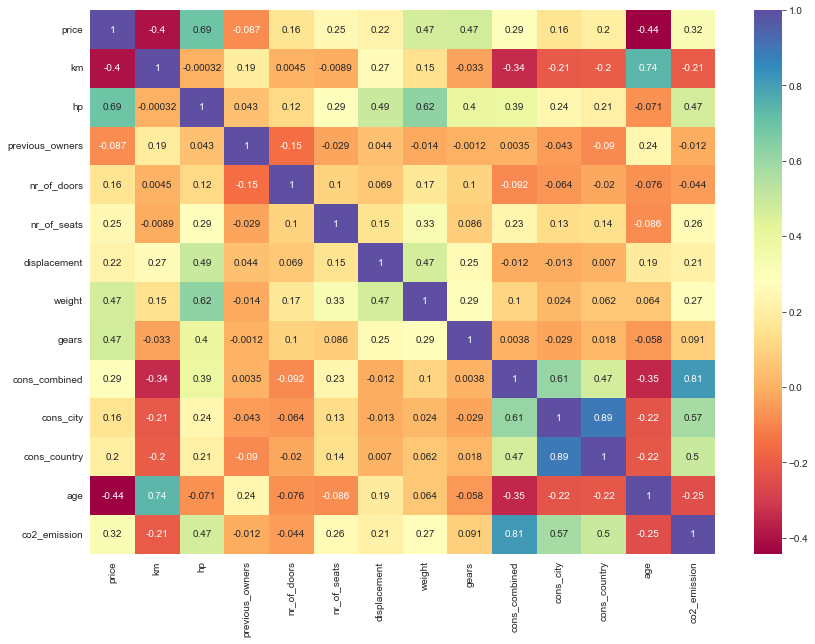

In [548]:
plt.figure(figsize = (14,10))
sns.heatmap(data=df.corr(), 
            annot=True, 
            cmap='Spectral');

<AxesSubplot:>

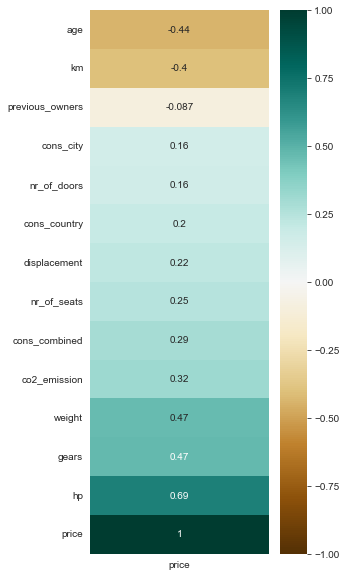

In [549]:
fig,ax = plt.subplots(figsize=(4, 10))
sns.heatmap(data=df.corr()[['price']].sort_values(by='price'),
            vmin = -1, vmax = 1, 
            annot=True, 
            cmap='BrBG')

## Export dataframe to csv file (without dummy)

In [ ]:
df.to_csv("final_scout_not_dummy.csv", index=False)

# Dummy Operation

## Export dataframe to csv file (dummy)

In [ ]:
df_dummied.to_csv("final_scout_dummy.csv", index=False)